In [31]:
from PIL import Image
import numpy as np

from google.colab.patches import cv2_imshow
import cv2

In [32]:
#CITRA RGB
imgRGB = Image.open("D1.JPG")

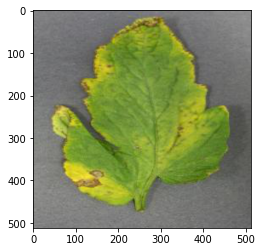

In [33]:
import matplotlib.pyplot as plt

#RESIZE IMAGE RGB
imgResizeRGB = imgRGB.resize((512,512))

#TAMPILAN CITRA RGB
plt.imshow(imgResizeRGB) 

In [ ]:
"""
#TEMP CITRA CONVERTER
imgTemp = Image.new('L',(512, 512),(0))

#CONVET RGB TO GRAYSCALE
for x in range (512):
  for y in range (512):
    warna = imgResizeRGB.getpixel((x,y))
    R = warna[0]
    G = warna[1]
    B = warna[2]
    grey = int((0.22989 * R) + (0.5870 * G) + (0.1141 * B))
    imgTemp.putpixel((x,y),(grey))
plt.imshow(imgTemp)
"""

In [ ]:
"""
import matplotlib.pyplot as plt
plt.figure(figsize=(18,18))
plt.imshow(gray)
plt.axis('off')
plt.show()
"""

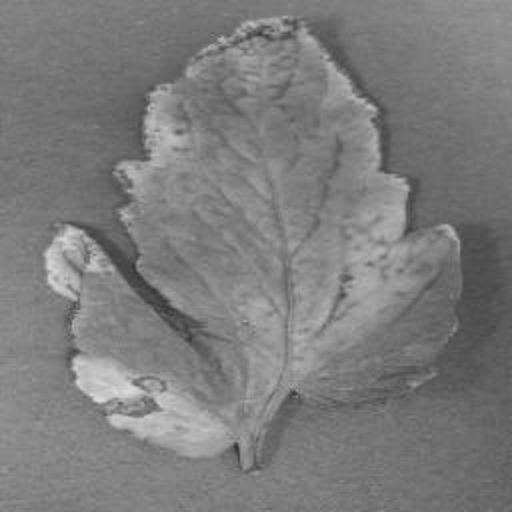

In [36]:
#CONVERT RGB TO GRAYSCALE
image = cv2.imread("D1.JPG")
gray= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # konversi RGB ke Grayscale menggunakan library opencv

#SAVE HASIL GREYSCALE
cv2.imwrite("D1Gray.JPG", gray)

#TAMPILKAN GRAYSCALE
imgGray = Image.open("D1Gray.JPG")
imgResizeGray = imgGray.resize((512,512))
imgResizeGray

In [37]:
# Load the image in greyscale
img1 = cv2.imread('D1Gray.JPG',0)

# Apply Gaussian Blur
#blur = cv2.GaussianBlur(imgGray,(3,3),0)

# Remove noise by blurring with a Gaussian filter
blur = cv2.GaussianBlur(img1, (3, 3), 0)

# Apply Laplacian operator in some higher datatype
laplacian = cv2.Laplacian(blur,cv2.CV_64F, 3)

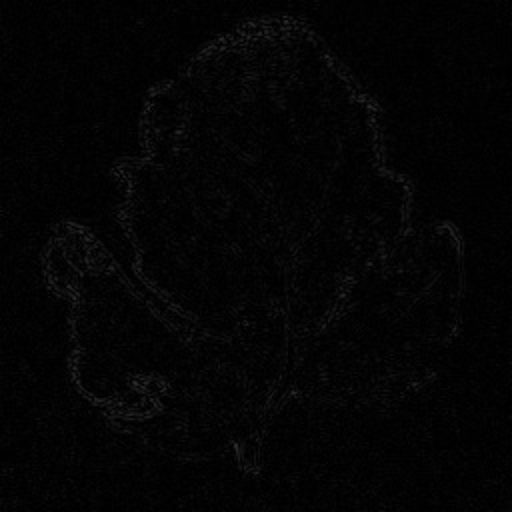

In [38]:
# converting back to uint8
abs_dst = cv2.convertScaleAbs(laplacian)

cv2.imwrite("D1LOG.JPG", abs_dst)

imgGray = Image.open("D1LOG.JPG")
imgResizeGray = imgGray.resize((512,512))
imgResizeGray

In [39]:
# But this tends to localize the edge towards the brighter side.
laplacian1 = laplacian/laplacian.max()

In [40]:
def Zero_crossing(image):
    z_c_image = np.zeros(image.shape)
    
    # For each pixel, count the number of positive
    # and negative pixels in the neighborhood
    
    for i in range(1, image.shape[0] - 1):
        for j in range(1, image.shape[1] - 1):
            negative_count = 0
            positive_count = 0
            neighbour = [image[i+1, j-1],image[i+1, j],image[i+1, j+1],image[i, j-1],image[i, j+1],image[i-1, j-1],image[i-1, j],image[i-1, j+1]]
            d = max(neighbour)
            e = min(neighbour)
            for h in neighbour:
                if h>0:
                    positive_count += 1
                elif h<0:
                    negative_count += 1
 
 
            # If both negative and positive values exist in 
            # the pixel neighborhood, then that pixel is a 
            # potential zero crossing
            
            z_c = ((negative_count > 0) and (positive_count > 0))
            
            # Change the pixel value with the maximum neighborhood
            # difference with the pixel
 
            if z_c:
                if image[i,j]>0:
                    z_c_image[i, j] = image[i,j] + np.abs(e)
                elif image[i,j]<0:
                    z_c_image[i, j] = np.abs(image[i,j]) + d
                
    # Normalize and change datatype to 'uint8' (optional)
    z_c_norm = z_c_image/z_c_image.max()*255
    z_c_image = np.uint8(z_c_norm)
 
    return z_c_image

In [ ]:
"""
th = 100
for x in range (512):
  for y in range (512):
    abuabu = imgResizeGray.getpixel((x,y))
    if abuabu >= th:
      imgResizeGray.putpixel((x,y),(255))
    else:
      imgResizeGray.putpixel((x,y),(0))
plt.imshow(imgResizeGray)
"""

"""
from google.colab.patches import cv2_imshow
import cv2
imagee = cv2.imread("gray.jpg")
grayy = cv2.cvtColor(imagee, cv2.COLOR_BGR2GRAY)
ret, biner = cv2.threshold(gray,150,255, cv2.THRESH_BINARY)
#cv2.imshow("Frame", biner)

import matplotlib.pyplot as plt
plt.figure(figsize=(18,18))
plt.imshow(biner)
plt.axis('off')
plt.show()
"""

"""
im_gray = cv2.imread('gray.jpg', cv2.CV_LOAD_IMAGE_GRAYSCALE)
(thresh, im_bw) = cv2.threshold(im_gray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
thresh = 127
im_bw = cv2.threshold(im_gray, thresh, 255, cv2.THRESH_BINARY)[1]
"""

"""
# membaca gambar baymax 
img = cv2.imread('gray.jpg',0)

# Hitungan threshold. 
# Perhatikan nilai ambang batas bawah dan atas dari tiap fungsi 
# yang diberikan
ret,thresh1 = cv2.threshold(img,180,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

# menampilkan hasil
titles = ['Gambar asli','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

# menampilkan beberapa gambar sekaligus
for i in range(6):
    # 3 baris, 2 kolom
    plt.subplot(3,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()
"""

"""
# menampilkan hasil
titles = ['IMAGE GRAYSCALE','BINARY']
images = [imgGray, biner]

# menampilkan beberapa gambar sekaligus
for i in range(2):
    # 3 baris, 2 kolom
    plt.subplot(1,2,i+1),
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()
"""

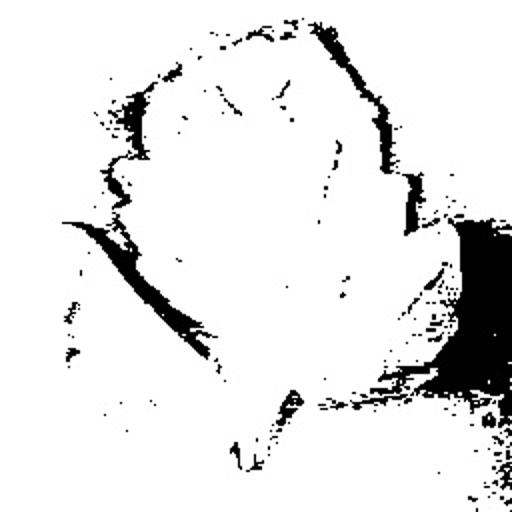

In [42]:
#CONVERT GRAYSCALE TO BINER
imgGray = cv2.imread('D1Gray.JPG', 0)
ret, biner = cv2.threshold(imgGray,100,255,cv2.THRESH_BINARY)

#SAVE HASIL GREYSCALE
cv2.imwrite("D1Biner.JPG", biner)

#TAMPILKAN Biner
imgBiner = Image.open("D1Biner.JPG")
imgResizeBiner = imgBiner.resize((512,512))
imgResizeBiner